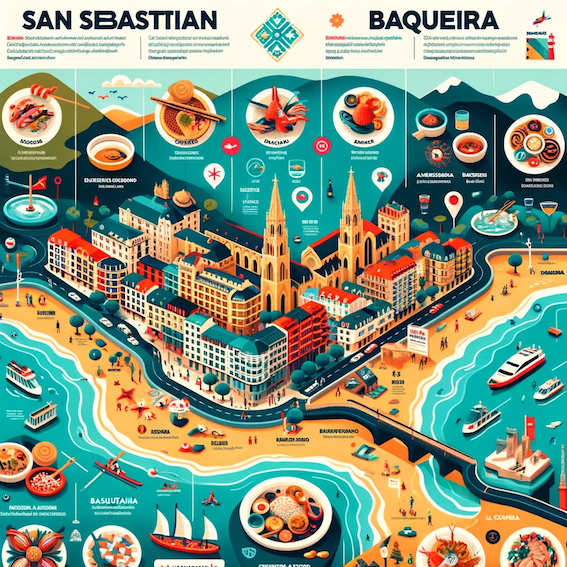

## Introducción

En los últimos años, el sector del alquiler vacacional en España ha experimentado una evolución notablemente positiva, marcada por un crecimiento sostenido y una diversificación en su oferta. Esta transformación no solo refleja un cambio en las preferencias de los consumidores, sino que también evidencia la adaptabilidad y la innovación dentro del sector turístico.

Ante la gran variedad y cantidad de datos que se generan en este tipo de negocio, realizar un análisis en profundidad es fundamental. Comprender patrones y tendencias de comportamiento no solo es esencial para conocer el mercado actual, sino que permite la creación de acciones comerciales más efectivas y adaptadas a os diferentes tipos de viajeros.

En el presente EDA (Análisis Exploratorio de Datos), se estudia el caso particular de FeelFree, una empresa con varios años de trayectoria, especializada en la gestión de apartamentos en dos regiones clave de España: San Sebastián y Baqueira.


## Objetivos

1.	Encontrar segmentos clave alto impacto en los ingresos.
La metodología incluirá un análisis detallado de los datos de reservas, segmentando por variables como origen, género, temporada, y otras características de los huéspedes. 

2.	Encontrar segmentos clave por crecimiento interanual
Aquí, el enfoque estará en identificar aquellos segmentos que han mostrado un crecimiento interanual sustancial. 

3.	Detectar fortalezas en el posicionamiento del canal de venta propio
Este objetivo implica analizar el rendimiento del canal de ventas propio de la empresa (la web) comparado con otros canales (como agencias de viajes online o plataformas de reservas). El análisis se enfocará en identificar segmentos de mercado o países donde el canal propio tiene una ventaja competitiva en términos de reservas. 

4.	Mejorar el conocimiento demográfico y geográfico de los viajeros
El último objetivo busca establecer una segmentación clara tanto geográfica como demográfica para afinar acciones de comunicación y marketing. 


## Data cleaning y Data mining

En mi estudio comienzo con un proceso de limpieza y procesado de los datos orientado a mejorar la calidad de la información que proporcionan e identificar errores.

#### Herramientas

- **Python**: lenguaje de programación base para todo el desarrollo del EDA.
- **Pandas**: fundamental para el manejo de datos. Utilizo esta biblioteca para cargar, manipular y analizar los datos en formato DataFrame. Es especialmente útil para la limpieza de datos, como la eliminación de duplicados, el manejo de valores nulos, y la transformación de formatos de datos. Funciones como read_excel, drop_duplicates, y fillna son algunas de las que empleo para estas tareas.
- **NumPy**: NumPy es una biblioteca que me permite realizar operaciones matemáticas y estadísticas avanzadas. La utilizo para manipulaciones numéricas como cálculos estadísticos, operaciones con matrices y generación de números aleatorios. Funciones como mean, median, y std de NumPy me ayudan en el análisis estadístico de los datos.
- **Matplotlib y Seaborn**: para la visualización de datos. Estas bibliotecas me permiten crear gráficos y diagramas que facilitan la interpretación y presentación de los datos. Utilizo Matplotlib para personalizar gráficos detalladamente y Seaborn para generar visualizaciones más complejas de manera sencilla, como histogramas, diagramas de caja, y mapas de calor.
- **Funciones Personalizadas**: además de estas bibliotecas, utilizo funciones personalizadas. Estas funciones me permiten automatizar tareas repetitivas y específicas de mi proyecto, como transformaciones de datos particulares o cálculos estadísticos específicos.
- **Datetime**: manejar datos de fecha y hora, empleo la biblioteca datetime. Es útil para convertir y manipular columnas de fecha y hora, lo que es crucial en muchos conjuntos de datos, especialmente para identificar tendencias a lo largo del tiempo.
- **Gender Guesser**: biblioteca de Python que se utiliza para predecir el género de una persona basado en su primer nombre. Esta herramienta se basa en un conjunto de reglas y datos que asocian nombres específicos con un género particular.



## Procesos

Carga de datos e importación de librerías necesarias para el trabajo:

In [48]:
import sys
sys.path.append('/Users/feeelfree/Desktop/Miguel/DATA/bootcamp/EDA/src/utils')

In [49]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as mtick
from funciones import * 

ruta= ("/Users/feeelfree/Desktop/Miguel/DATA/bootcamp/EDA/src/data/ff_conBQ.xlsx")
df=pd.read_excel(ruta)

**Garantizar la unicidad de los datos:** verifico y elimino registros duplicados para asegurar la integridad y precisión de los análisis posteriores. Utilizo funciones de Pandas para identificar duplicados y los elimino del conjunto de datos

In [50]:
df.duplicated().sum()

0

**Revisión exhaustiva de la estructura de datos:** analizo los tipos de datos presentes y reviso la existencia de valores nulos o faltantes. Esta tarea me ayuda a entender el contexto y la calidad general de los datos. Realizo una inspección detallada de cada columna para comprender su naturaleza y cómo deben ser tratados los datos.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36839 entries, 0 to 36838
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RESERVA_CODIGO         36839 non-null  int64         
 1   Destino                36839 non-null  object        
 2   Tipo alquiler          36839 non-null  object        
 3   Apartamento            36839 non-null  object        
 4   Nº habitaciones        36839 non-null  int64         
 5   Zona                   36839 non-null  object        
 6   Categoria              36839 non-null  object        
 7   Tour Operador          36839 non-null  object        
 8   Fecha reserva          36839 non-null  datetime64[ns]
 9   Fecha entrada          36839 non-null  datetime64[ns]
 10  Fecha salida           36839 non-null  datetime64[ns]
 11  date_cancel            36839 non-null  object        
 12  PAIS                   36612 non-null  object        
 13  E

**Evaluación estadística de variables numéricas:** realizo un análisis estadístico de las variables numéricas. Esto incluye calcular medidas de tendencia central como la media y la mediana, así como medidas de dispersión como el rango, la desviación estándar y los cuartiles

In [52]:
df.describe()

,RESERVA_CODIGO,Nº habitaciones,Fecha reserva,Fecha entrada,Fecha salida,noches,revenue,adr,num_people
count,36839.000000,36839.000000,36839,36839,36839,36839.000000,36839.000000,36839.000000,36839.000000
mean,71381.538723,2.420505,2021-06-23 12:15:13.510138880,2021-08-20 16:55:46.019164416,2021-08-27 20:20:47.330274816,1.646489,338.107572,342.177621,3.926817
min,45446.000000,0.000000,2018-02-08 00:00:00,2018-08-19 00:00:00,2019-01-02 00:00:00,-411.000000,-60000.000000,-28.871429,1.000000
25%,61926.500000,2.000000,2019-12-31 00:00:00,2020-02-15 00:00:00,2020-02-23 00:00:00,-3.000000,-957.000000,200.000000,2.000000
50%,71378.000000,2.000000,2021-09-28 00:00:00,2021-12-03 00:00:00,2021-12-08 00:00:00,3.000000,698.400000,281.100000,4.000000
75%,80800.500000,3.000000,2022-10-24 00:00:00,2022-12-28 00:00:00,2023-01-04 00:00:00,4.000000,1357.275000,418.500000,5.000000
max,91725.000000,6.000000,2023-12-12 00:00:00,2023-12-31 00:00:00,2024-09-02 00:00:00,606.000000,52668.000000,8571.428571,14.000000
std,11022.101444,0.962979,NaN,NaN,NaN,20.859630,2706.622050,223.465402,1.901482


**Identificación de inconsistencias y limpieza detallada:** basándome en el análisis estadístico, identifico áreas que requieren una limpieza más profunda. Esto incluye el manejo de valores atípicos y la imputación o eliminación de valores nulos, según sea adecuado. En algunos casos, transformo los datos para mejorar su utilidad

In [53]:
filtro_fecha_1 = df['Fecha entrada'] < '2019-01-01'
fecha_inicio = '2019-12-31'
fecha_fin = '2022-01-01'
filtro_fecha_2 = (df['Fecha entrada'] > fecha_inicio) & (df['Fecha entrada'] < fecha_fin)
filtro_combinado = filtro_fecha_1 | filtro_fecha_2
fecha_limite = datetime(2023, 11, 30)
filtro_fecha_limite = df['Fecha entrada'] <= fecha_limite
filtro_final = ~filtro_combinado & filtro_fecha_limite
df = df[filtro_final]

Trabajo con la columna “sex”, uso gender guesser para estimar el género de las filas con datos nulos en función del nombre del viajero

In [54]:
df['nombre_2'] = df['name'].str.split().str[0]
mask = (df["sex"].isna()) & (df["Estado"] == "COMPLETADO")
import gender_guesser.detector as gender
d = gender.Detector()
df.loc[mask, 'genero'] = df.loc[mask, 'nombre_2'].apply(d.get_gender)
df['sex'] = df['sex'].fillna(df['genero'])
df.loc[df["Estado"]=="COMPLETADO"].sex.value_counts(dropna=False)

sex
M              9497
F              8100
unknown          54
male             18
female            4
-                 2
mostly_male       2
andy              1
Name: count, dtype: int64

Aplico la misma nomenclatura que los valores originales y donde no hay dato aplico “sin dato”

In [55]:
sex_mapping = {"M":"M","F":"F",'male': 'M', 'mostly_male': 'M', 'female': 'F','andy': 'M'}
df['sex'] = df['sex'].map(sex_mapping)
df['sex'].fillna('sin dato', inplace=True)
df['sex'].replace('-', 'sin dato', inplace=True)

Detecto valores erróneos en el campo país para eliminarlos posteriormente

In [56]:
valores_menos_4_digitos = df[df['PAIS'].str.len() < 4]['PAIS'].unique()
valores_menos_4_digitos

array(['0', 'lv', 'ru', 'ec', 'dz', 'ua', 'vn', 'za', 'uy', 'cz', 'si',
       'ad', 'qa', 'my', 'jp', 'cl', 'do', 'tr', 'kh', 'eg', 'hk', 'bo',
       'cr', 'lu', 'hu', 'tw', 'rs', 'gu', 'cn'], dtype=object)

In [57]:
df.loc[df['PAIS'].str.len() < 4, 'PAIS'] = 'otros'
df['PAIS'].fillna('otros', inplace=True)

Transformo las fechas a un formato manejable

In [58]:
# Trabajo con birth_date
df['birth_date'] = pd.to_numeric(df['birth_date'], errors='coerce') 
fecha_referencia = pd.to_datetime('1900-01-01')
df['fecha_nacimiento'] = fecha_referencia + pd.to_timedelta(df['birth_date'], unit='D')
df.fecha_nacimiento

158            NaT
159     1968-08-05
160            NaT
161     1969-12-08
162     1985-11-09
           ...    
36141   1970-01-03
36142          NaT
36143   1965-11-01
36144   1993-02-07
36145   1989-04-14
Name: fecha_nacimiento, Length: 25284, dtype: datetime64[ns]

**Preparación para análisis posteriores:** tras completar estos pasos, me aseguro de que los datos estén limpios, estructurados y listos para análisis más avanzados. Además añado información necesaria para posteriores anális mediante procesamiento de los datos existentes

Añado una columna con el campo edad en función de la fecha de nacimiento y el año de estancia

In [59]:
df['año'] = df['Fecha entrada'].dt.year 
fecha_actual = datetime.now()
df['edad'] = ((fecha_actual - df['fecha_nacimiento']).dt.days) / 365.25
df['edad'] = df['edad'] - (2023 - df['año'])
df.edad=round(df.edad)
df['edad'] = pd.to_numeric(df['edad'], errors='coerce')

Añado nueva información

In [60]:
df['date_cancel'] = pd.to_datetime(df['date_cancel'], errors='coerce')
df["duración"]=df["Fecha salida"]-df["Fecha entrada"]
df["antelación_reserva"]=df["Fecha entrada"]-df["Fecha reserva"]
df["antelación_cancelación"]=df["Fecha entrada"]-df["date_cancel"]
df['día'] = df['Fecha entrada'].dt.day_name()  
df['mes'] = df['Fecha entrada'].dt.month_name()  
df['año'] = df['Fecha entrada'].dt.year 
df.comunications_acepted=pd.to_numeric(df.comunications_acepted,errors='coerce')

Trabajo con el campo niños como paso previo para la segmentación posterior

In [61]:
df['children'] = pd.to_numeric(df['children'], errors='coerce')
df['babies'] = pd.to_numeric(df['babies'], errors='coerce')
df['children'].fillna(0, inplace=True)
df['babies'].fillna(0, inplace=True)

Por otro lado, para un mejor conocimiento de los viajeros creo una segmentación de clientes en función del tipo y cantidad de viajeros en cada reserva:

-	Solo: reservas de una sola persona.
-	Pareja: reservas de dos personas.
-	Familia: reservas de dos personas y al menos un niño.
-	Grupo: más de tres personas.
-	Grupo grande: más de cinco personas.	

In [62]:
df.loc[(df['num_people'] == 1) & (df['children'] == 0) & (df['babies'] >= 0) , 'segmento'] = 'solo'
df.loc[(df['num_people'] == 2) & (df['children'] == 0) & (df['babies'] == 0) , 'segmento'] = 'pareja'
df.loc[(df['num_people'] >= 2) & ((df['children'] > 0) | (df['babies'] > 0)), 'segmento'] = 'familia'
df.loc[(df['num_people'] > 2) & (df['children'] == 0) & (df['babies'] == 0), 'segmento'] = 'grupo'
df.loc[(df['num_people'] > 5) & (df['children'] == 0) & (df['babies'] == 0), 'segmento'] = 'grupo grande'

Segmento clientes en diferentes grupos de edad

In [63]:
bins = [0, 25, 35, 45,55,65, 150] 
etiquetas = ['0-24', '25-34', '35-44','45-54','55-65','66+']
df['edad_agrupada'] = pd.cut(df['edad'], bins=bins, labels=etiquetas, right=False)

Segmento reservas en diferentes grupos de revenue

In [64]:
bins = [0, 1000, 2500, 6000, 999999999] 
etiquetas = ['bajo', 'medio', 'alto', 'muy alto']
df['revenue_agrupado'] = pd.cut(df['revenue'], bins=bins, labels=etiquetas, right=False)

Segmento por temporadas dentro del año

In [65]:
df['mes'] = pd.to_datetime(df['mes'], format='%B').dt.month
condiciones = [
    (df['mes'].isin([6, 7, 8, 9])),  # Junio a septiembre (alta)
    (df['mes'].isin([4, 5, 10])),     # Octubre, mayo, abril (media)
    (~df['mes'].isin([4, 5, 6, 7, 8, 9, 10]))  # Resto de meses (baja)
]
etiquetas = ['alta', 'media', 'baja']
df['temporada'] = np.select(condiciones, etiquetas, default='baja')

Renombro algunos datos y aplico formato más manejable

In [66]:
df.rename(columns={"date_cancel":"fecha_cancelación","PAIS":"pais","duración":"estancia_media","num_people":"personas",
                   "children":"niños","babies":"bebes","vip":"repetidor"
                   },inplace=True)
df.drop(columns=["birth_date","name","nombre_2","fecha_nacimiento","genero"],inplace=True)
df['estancia_media'] = df['estancia_media'].dt.days
df['antelación_reserva'] = df['antelación_reserva'].dt.days
df['edad'].fillna('sin edad', inplace=True)
columnas_a_redondear = ['noches', 'revenue', 'adr', 'personas', 'niños', 'bebes', 'estancia_media', 'antelación_reserva']
df[columnas_a_redondear] = df[columnas_a_redondear].round(1)

Agrupo los datos de Touroperador y País para poder manejar mejor esta información 

In [67]:
frecuencias_tour_operador = df['Tour Operador'].value_counts()
top6_tour_operador = frecuencias_tour_operador.head(6).index
df['canal'] = df['Tour Operador'].where(df['Tour Operador'].isin(top6_tour_operador), 'Otros')

frecuencias_pais = df['pais'].value_counts()
top6pais= frecuencias_pais.head(6).index
df['pais_agrupado'] = df['pais'].where(df['pais'].isin(top6pais), 'Otros')

Por último, creo subdataframes para un mejor análisis posterior de los datos

In [68]:

# DataFrame de alquiler vacacional y estado COMPLETADO
df_vacacional_confirmado = df[(df['Tipo alquiler'] == 'Turistico') & (df['Estado'] == 'COMPLETADO')]
df_vacacional_confirmado_BQ = df[(df['Tipo alquiler'] == 'Turistico') & (df['Estado'] == 'COMPLETADO')& (df['Destino'] == 'Baqueira')]
df_vacacional_confirmado_SS = df[(df['Tipo alquiler'] == 'Turistico') & (df['Estado'] == 'COMPLETADO')& (df['Destino'] == 'San Sebastián')]

# DataFrame de alquiler vacacional y estado CANCELADO
df_vacacional_cancelado = df[(df['Tipo alquiler'] == 'Turistico') & (df['Estado'] == 'CANCELADO')]

# DataFrame de alquiler temporal y estado COMPLETADO
df_temporal_confirmado = df[(df['Tipo alquiler'] == 'Temporada') & (df['Estado'] == 'COMPLETADO')]

# DataFrame de alquiler temporal y estado CANCELADO
df_temporal_cancelado = df[(df['Tipo alquiler'] == 'Temporada') & (df['Estado'] == 'CANCELADO')]


## CONCLUSIONES RELEVANTES



###  Segmentos de clientes con un alto impacto en los ingresos:

Para medir aquellos grupos que tienen un alto impacto en los ingresos se han establecido 2 indicadores: *adr* (precio medio por noche reservada) y *estancia media* . A mayores valores de estos dos indicadores mayores ingresos. 

- **adr** : el indicador ADR, o "Average Daily Rate", es una métrica comúnmente utilizada en la industria hotelera y de alojamiento. Proporciona un promedio de los ingresos generados por reserva. Se calcula dividiendo el total de ingresos entre el número de días reservado.

$$ \text{adr} = \frac{\text{revenue}}{\text{noches totales}} $$

- **estancia media** : La "estancia media" (o duración media de la estancia) es una métrica utilizada en la industria hotelera y de alojamiento para medir la duración promedio de la estancia de los huéspedes en un hotel o establecimiento similar. Se calcula dividiendo el total de noches entre el total de reservas. En resumenn el número de noches que dura cada reserva.

$$ \text{estancia media} = \frac{\text{noches}}{\text{reserva}} $$


Los siguientes resultados son para el destino San Sebastián de alquiler vacacional.

Después de agrupar los viajeros por nacionalidad y analizar su adr observamos mayor precio por noche en los **estadounidenses**.

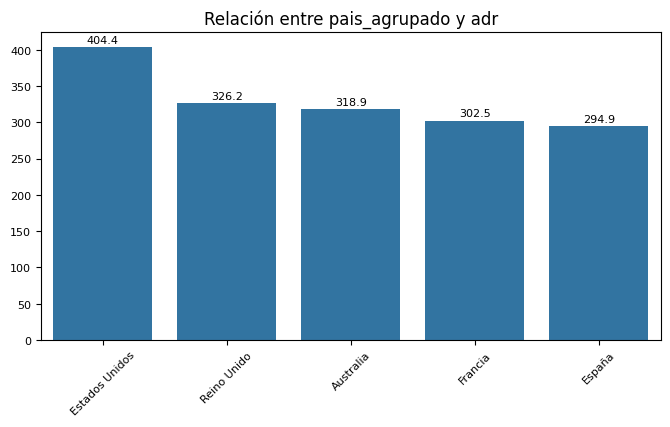

In [69]:
df_filtered = df_vacacional_confirmado_SS[df_vacacional_confirmado_SS['pais_agrupado'].isin(['Estados Unidos',"Reino Unido","Australia","Francia","España"])]
plot_categorical_numerical_relationship(df_filtered,"pais_agrupado","adr",show_values=True)

Analizando aquellas reservas de más de 2.500 euros vemos que el mayor porcentaje y el mayor crecimiento se encuentra dentro de **EE.UU**.

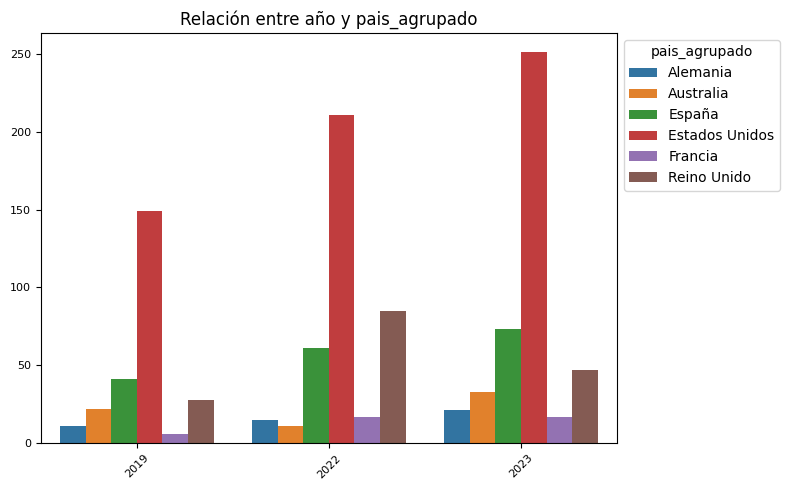

In [84]:
df_filtered = df_vacacional_confirmado_SS[df_vacacional_confirmado_SS['revenue_agrupado'].isin(["alto","muy alto"])]
df_filtered=df_filtered.loc[df_filtered["pais_agrupado"]!="Otros"]
plot_categorical(df_filtered, "año", "pais_agrupado", relative_freq=False, show_values=False)

Análisis demográfico: dentro del mercado estadounidense, ¿cómo evoluciona el perfil del viajero por edad?, vemos que hay una **tendencia hacia un perfil más senior**.


2019


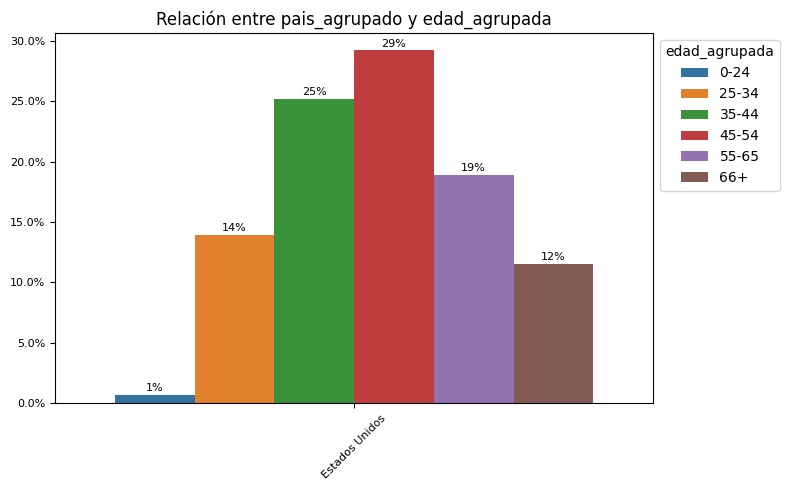

2022


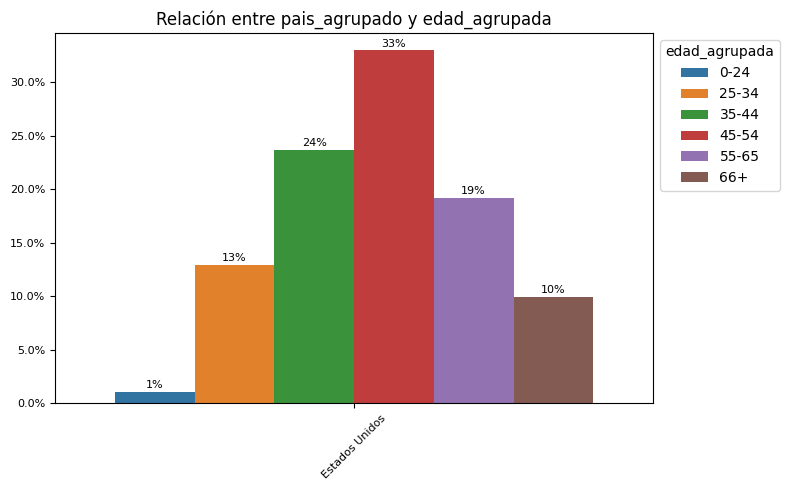

2023


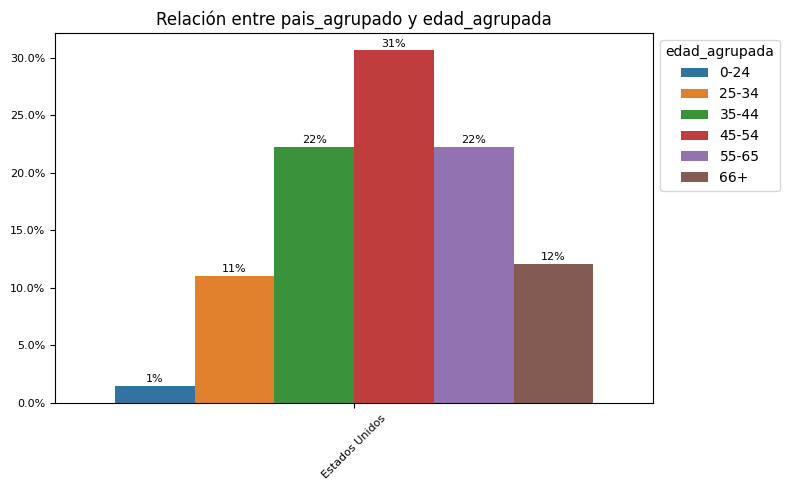

In [71]:
df_filtered = df_vacacional_confirmado_SS[df_vacacional_confirmado_SS['pais_agrupado'].isin(['Estados Unidos'])]
valores_anio = df_filtered['año'].unique()

for año in valores_anio:
    df_anio = df_filtered[df_filtered['año'] == año]
    print(año)
    plot_categorical(df_anio, "pais_agrupado", "edad_agrupada", relative_freq=True, show_values=True)

Los diferentes datos obtenidos en el análisis marcan EE.UU como la nacionalidad con mayor impacto en revenue por tener un **adr mayor** que el resto. Por otro lado también se ha observado que esta nacionalidad también tiene una **estancia media mayor** que el resto.

Como se ha podido comprobar a lo largo del análisis, este segmento tiene un peso clave en **temporada alta y también en temporada media** siendo su impacto en temporada baja reducido. El perfil del viajero es de mediana edad con cierto **crecimiento del perfil senior**. También se ha analizado las reservas por género viendo una ligera mayoría del **grupo femenino**. 

###  Segmentos con alto crecimiento interanual:

En el siguiente apartado se estudiarán aquellos grupos de viajeros en los que se observa mayor crecimiento interanual. 

Los siguientes resultados son para el destino San Sebastián de alquiler vacacional.

Después de agrupar los viajeros por nacionalidad se detecta un crecimiento significativo en EE.UU. y un decrecimiento en el turista nacional.


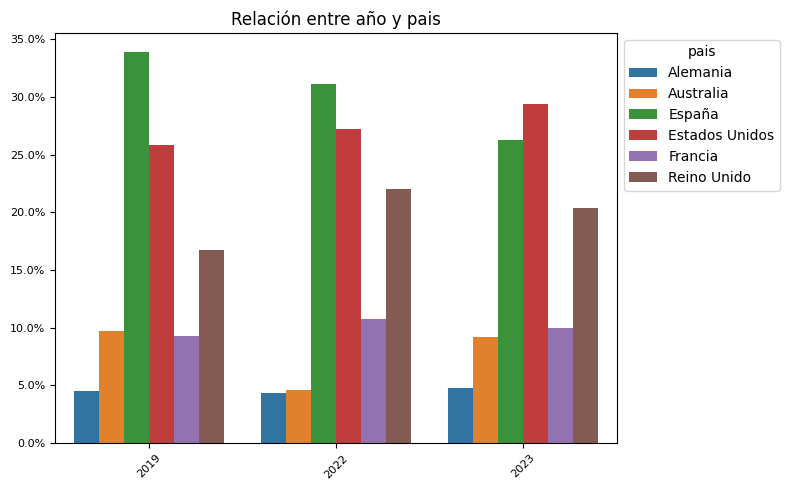

In [72]:
plot_categorical(df_vacacional_confirmado_SS[df_vacacional_confirmado_SS['pais_agrupado'] != 'Otros'], "año","pais", relative_freq = True, show_values = False)

Por otro lado, para un mejor conocimiento de los viajeros se crean diferentes segmentos con esta clasificación:

-	Solo: reservas de una sola persona.
-	Pareja: reservas de dos personas.
-	Familia: reservas de dos personas y al menos un niño.
-	Grupo: más de tres personas.
-	Grupo grande: más de cinco personas.	

Después de diversos análisis puede observarse un crecimiento mayor en el segmento familias. El siguiente gráfico muestra las reservas de este segmento en 2019 y su evolución en 2023. Datos para Sebastián vacacional.


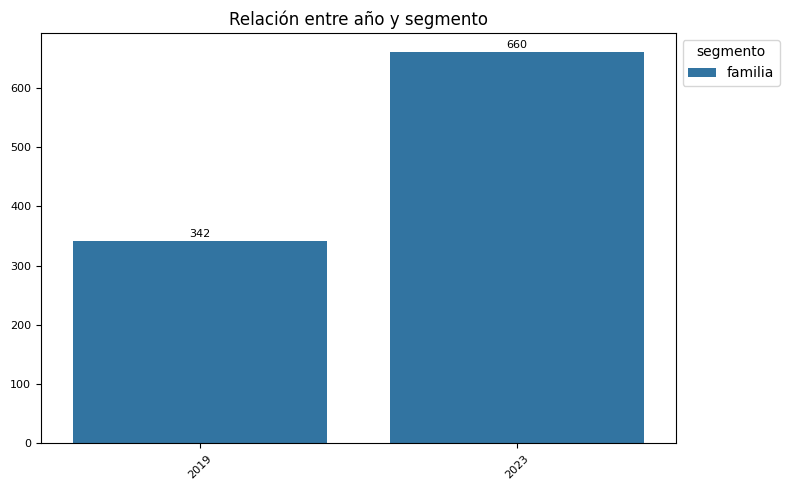

In [73]:
df_filtered = df_vacacional_confirmado_SS[df_vacacional_confirmado_SS['segmento'].isin(['familia'])]
df_filtered = df_filtered[df_filtered['año'].isin([2019,2023])]
plot_categorical(df_filtered, "año", "segmento", relative_freq=False, show_values=True)

El crecimiento del segmento familias no es algo exclusivo del destino San Sebastián, el siguiente gráfico muestra el porcentaje de reservas por segmento y año en el destino Baqueira. Podemos ver un crecimiento muy importante. 

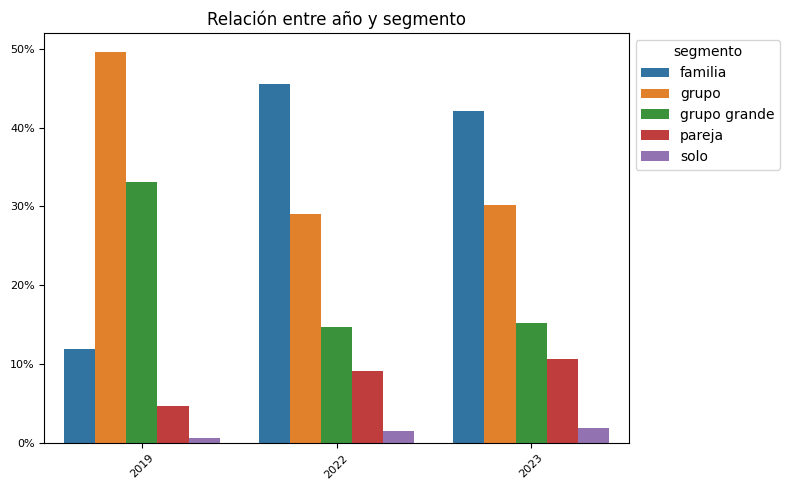

In [74]:
plot_categorical(df_vacacional_confirmado_BQ, "año","segmento", relative_freq = True, show_values = False)

Cuando nos referimos a los diferentes segmentos de viajeros, ¿cómo es en EEUU, el canal con mayor adr y estancia media? La mayor estancia media la encontramos en el segmento familias

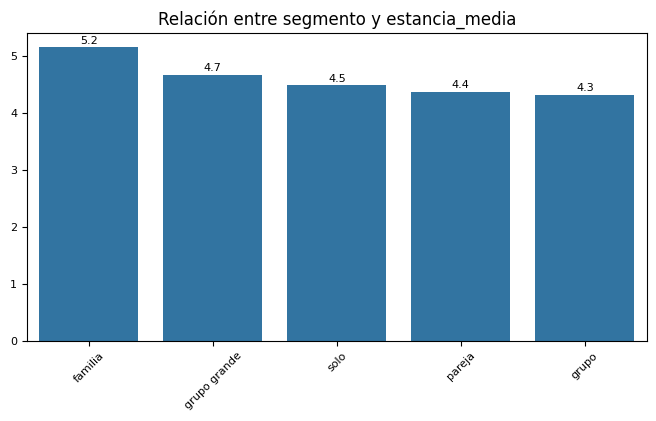

In [75]:
plot_categorical_numerical_relationship(df_vacacional_confirmado_SS[df_vacacional_confirmado_SS['pais_agrupado'] == 'Estados Unidos'],"segmento","estancia_media",show_values=True)

Analizando el adr de los diferentes segmentos por tipología de apartamentos podemos ver que en las familias hay una tendencia a haber mayores niveles de precio medio

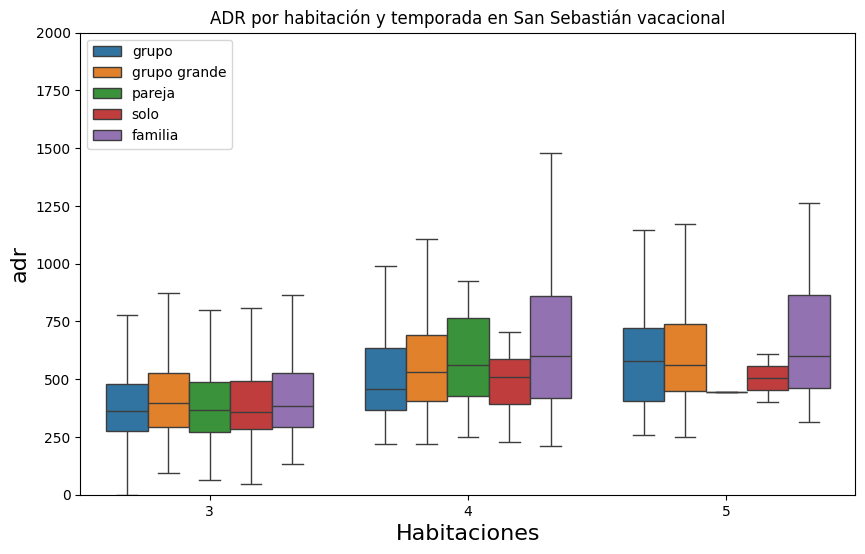

In [76]:
filtered_df = df_vacacional_confirmado_SS.loc[df_vacacional_confirmado_SS["Nº habitaciones"].isin([3, 4, 5])]


plt.figure(figsize=(10, 6))
sns.boxplot(x="Nº habitaciones",
            y="adr",
            hue="segmento",
            data=filtered_df,
            fliersize=0)
plt.title("ADR por habitación y temporada en San Sebastián vacacional", fontsize=12)
plt.xlabel("Habitaciones", fontsize=16)
plt.ylabel("adr", fontsize=16)
plt.legend(loc="upper left")
plt.ylim(0, 2000)
plt.show()

A modo de **conclusión**, tras un análisis exhaustivo de los datos, se observa una tendencia creciente en el grupo de viajeros de origen norteamericano en la ciudad. Este aumento sugiere una creciente atracción de la región para este segmento del mercado, probablemente debido a sus atractivos culturales, históricos o de ocio. Por otro lado, el segmento familiar muestra una notable presencia tanto en la ciudad como en otros destinos populares.

Resulta particularmente interesante el comportamiento del segmento de familias en San Sebastián. Aquí, se ha registrado una mayor rentabilidad comparativa, impulsada por una estancia media más prolongada por reserva y un precio medio por noche superior para los diferentes tamaños de apartamentos. Esto indica que las familias no solo prefieren pasar más tiempo en San Sebastián, sino que también están dispuestas a invertir más en su alojamiento, lo que sugiere una percepción de valor elevado en las ofertas de esta ciudad.

## Fortalezas del canal de venta propio

En el ámbito del alquiler de apartamentos turísticos, la dimensión del comercio electrónico juega un papel crucial, con la gran mayoría de las ventas realizándose en línea. En este contexto digital, diversas agencias especializadas venden a segmentos específicos de clientes y contribuyen significativamente al volumen de ventas. Sin embargo, es importante destacar que estas reservas a través de agencias conllevan el pago de comisiones como honorarios por sus servicios.

Dada esta realidad, cobra especial importancia la potenciación del canal de venta directa, en este caso, a través del sitio web propio de la empresa. La venta directa ofrece una ventaja clave en términos de rentabilidad, ya que se evitan las comisiones asociadas a las reservas intermediadas por agencias. Al fomentar este canal, se busca no solo incrementar los márgenes de beneficio sino también fortalecer la relación directa con los clientes, permitiendo una mayor flexibilidad y personalización en la oferta de servicios.

En este estudio se han seguido diversas líneas de análisis tratando de detectar grupos de viajeros con una mayor preferencia por la reserva web para tratar de potenciarlo.

Los siguientes resultados son para el destino San Sebastián de alquiler vacacional.


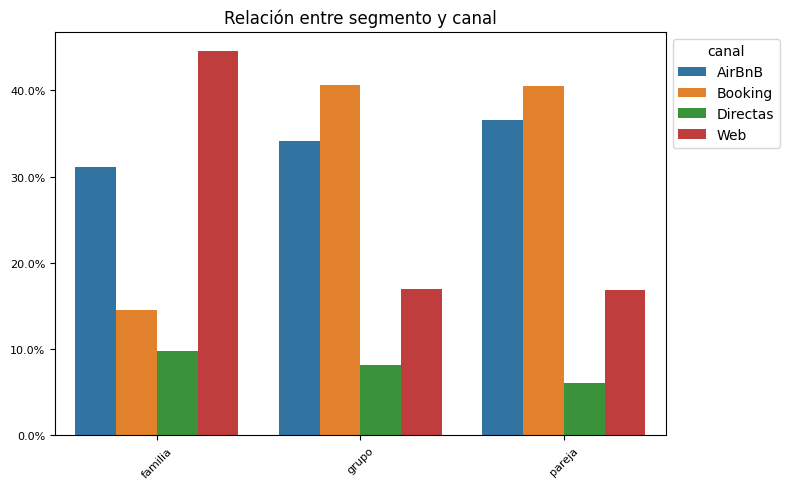

In [77]:
df_filtered = df_vacacional_confirmado_SS[df_vacacional_confirmado_SS['segmento'].isin(['familia', "grupo", "pareja"])]
df_filtered = df_filtered[df_filtered['canal'].isin(['Web', 'Booking',"Directas","AirBnB"])]
plot_categorical(df_filtered, "segmento", "canal", relative_freq=True, show_values=False)

El anterior gráfico muestra las reservas agrupadas de los principales segmentos y canales de venta. Como puede verse hay una clara **preferencia de las familias** por el canal de venta propio, siendo casi el 50% de las reservas de este segmento **por la web propia**.

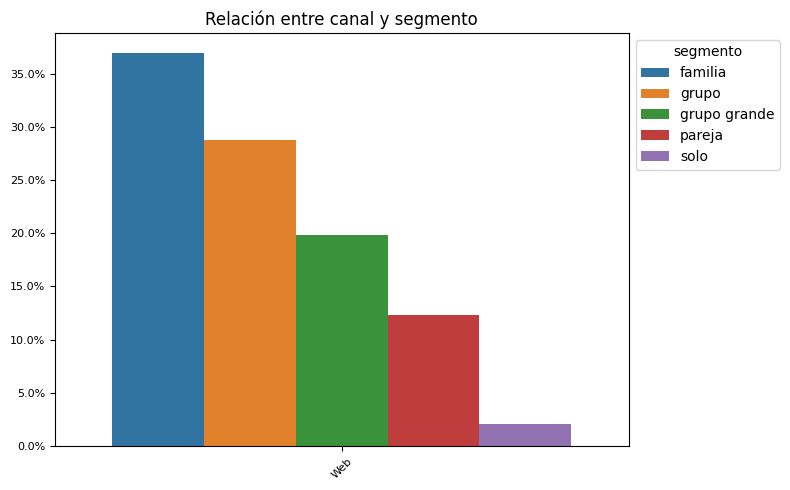

In [78]:
df_filtered = df_vacacional_confirmado_SS[df_vacacional_confirmado_SS['revenue_agrupado'].isin(["alto","muy alto"])]
df_filtered=df_filtered.loc[df_filtered["pais_agrupado"]=="Estados Unidos"]
plot_categorical(df_filtered.loc[df_filtered["canal"]=="Web"], "canal", "segmento", relative_freq=True, show_values=False)

Si analizamos las reservas de más de 2.500 euros hechas por la web propia vemos que el mayor porcentaje corresponde al segmento familias. 

Además de lo anterior, puede verse un crecimiento considerable del segmento familias.
En el siguiente gráfico podemos ver las reservas del segmento familias hechas por la web propia por temporada en 2019 y en 2023.

Para estudiar las diferentes temporadas del año he realizado esta clasificación:

-	Alta: junio a septiembre (incluidos).
-	Media: octubre, mayo y abril.
-	Baja: resto de meses.


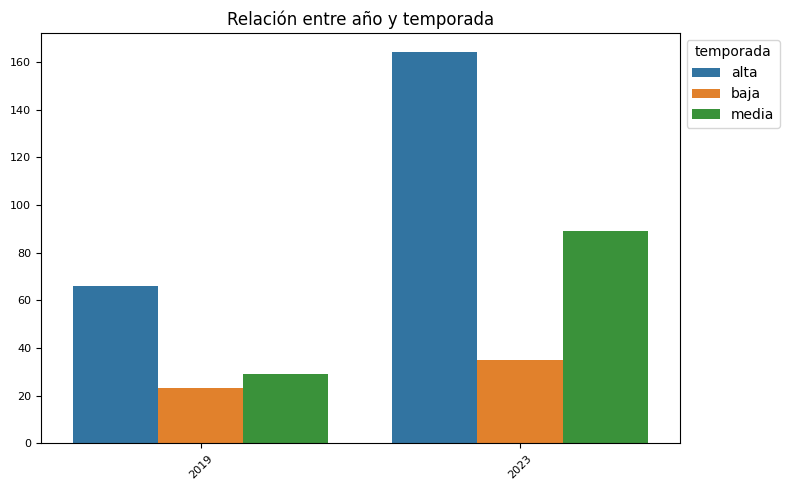

In [79]:
df_filtered = df_vacacional_confirmado_SS[df_vacacional_confirmado_SS['segmento'].isin(['familia'])]
df_filtered = df_filtered[df_filtered['canal'].isin(['Web'])]
df_filtered = df_filtered[df_filtered['año'].isin([2019,2023])]
plot_categorical(df_filtered, "año", "temporada", relative_freq=False, show_values=False)

A modo de **conclusión** podemos ver una mayor **preferencia de las familias por el canal propio**. Es lógico considerar que los viajeros con niños quieren tener todos los detalles de su viaje bien organizados y por ello prefieren la reserva directa con el gestor del alojamiento.

## Recomendaciones

En vista de estos hallazgos, se recomiendan varias acciones comerciales para capitalizar estas tendencias:

- **Enfoque en el mercado norteamericano**: dado el crecimiento de viajeros de Norteamérica, sería beneficioso desarrollar estrategias de marketing dirigidas específicamente a este segmento. Esto podría incluir publicidad en plataformas populares en Norteamérica, asociaciones con agencias de viajes norteamericanas, y la creación de paquetes o promociones que apelen a los intereses y preferencias de este grupo.
- **Paquetes familiares en San Sebastián**: considerando la rentabilidad y la preferencia de las familias por estancias más largas, sería estratégico diseñar paquetes de alojamiento especiales para familias en San Sebastián. Estos paquetes podrían incluir descuentos por estancias prolongadas, actividades familiares locales, y servicios adicionales como cuidado de niños o planes de comidas adaptados a las familias.
- **Mejora de la experiencia de alojamiento**: para mantener y mejorar la estancia media y el precio medio por noche, es crucial ofrecer una experiencia de alojamiento excepcional. Esto podría abarcar desde mejorar las comodidades en los apartamentos hasta ofrecer servicios adicionales personalizados, como guías turísticas locales, reservas en restaurantes familiares o actividades de ocio.
- **Promoción y publicidad**: es fundamental aumentar la visibilidad de San Sebastián como destino ideal para familias. Esto podría lograrse a través de campañas en redes sociales, colaboraciones con influencers familiares, y presencia en ferias de turismo y eventos relacionados con viajes familiares.
- **Investigación y retroalimentación continua**: para asegurar la eficacia de estas estrategias, es importante realizar una investigación de mercado continua y recopilar retroalimentación de los clientes. Esto ayudará a entender mejor las necesidades y preferencias de estos segmentos y a ajustar las estrategias según sea necesario.

Al implementar estas acciones comerciales, se puede esperar no solo captar una mayor cuota de estos segmentos del mercado, sino también mejorar la experiencia general del cliente, lo que a su vez puede llevar a una mayor fidelidad y recomendaciones positivas.

## Relación entre variables numéricas

Para terminar el análisis se realiza un análisis multivariable numérico para tratar de descubrir relaciones ocultas entre estas variables. Con el siguiente mapa de correlación vemos la correlación existente entre las variables numéricas de los datos estudiados. La correlación mide la relación estadística entre dos variables. Específicamente, indica hasta qué punto los cambios en una variable están asociados con los cambios en otra.

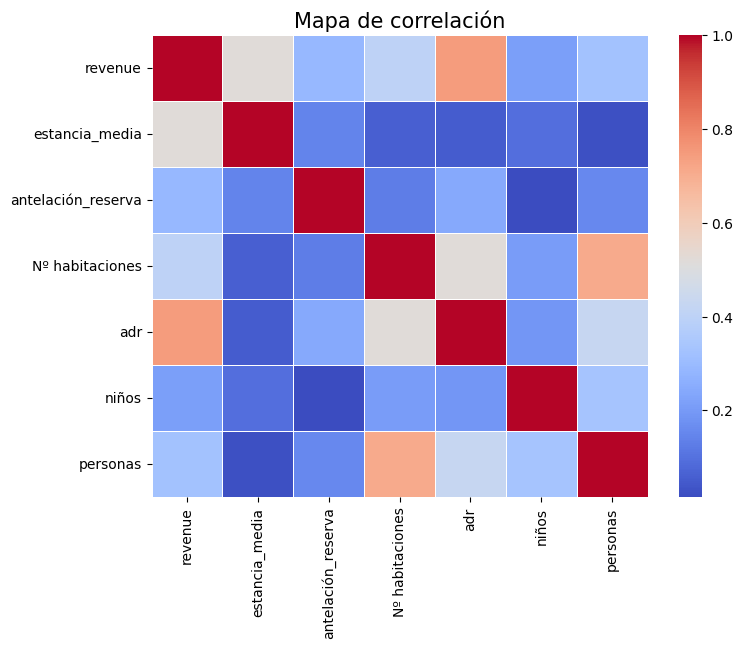

In [80]:
df_numerico = df_vacacional_confirmado[["revenue", "estancia_media", "antelación_reserva", "Nº habitaciones", "adr", "niños", "personas"]]
plt.figure(figsize=(8, 6))
cmap = "coolwarm"
ax = sns.heatmap(df_numerico.corr(), annot=False, cmap=cmap, linewidths=0.5)  # annot=False para quitar los valores dentro del gráfico
plt.title('Mapa de correlación', fontsize=15)
plt.show()

Este análisis muestra la relación evidente entre revenue, adr y estancia media. Como puede observarse el mayor porcentaje de cambio en revenue proviene del adr (0,7) y del número de habitaciones (0,7) , siendo el resto explicado por la estancia media (0,5).

**Diagrama de dispersión**,  realizo un diagrama de dispersión para medir la relación entre adr, revenue y estancia media en ambos destinos vacacionales para tratar de visualizar si la relación entre revenue y adr es igual em ambos destinos.

In [81]:
def grafico_dispersion_con_correlacion(data, x, y, hue):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=x, y=y, hue=hue, palette="coolwarm")
    correlacion = data[x].corr(data[y])
    plt.title(f'Gráfico de dispersión entre {x} y {y}\nCorrelación: {correlacion:.2f}', fontsize=12)
    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)
    plt.legend(title="estancia media", title_fontsize=8)
    plt.show()

Gráfico de disperisón para el destino San Sebastián

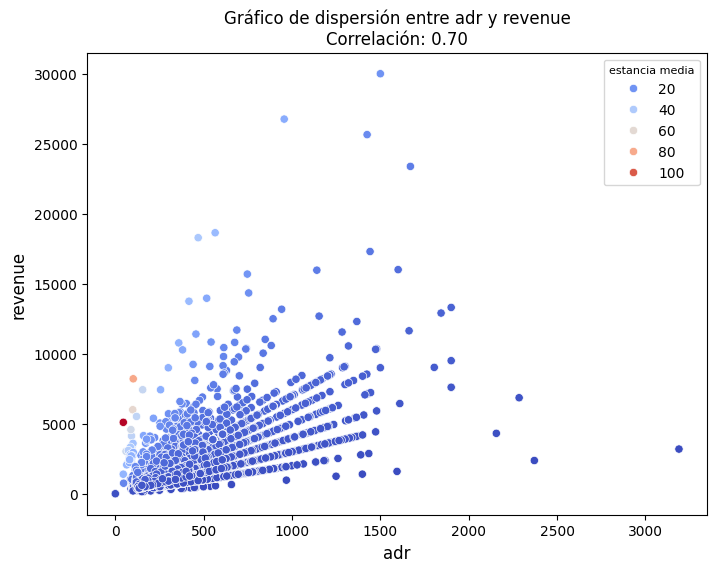

In [82]:
grafico_dispersion_con_correlacion(df_vacacional_confirmado_SS, "adr", "revenue", "estancia_media")

Gráfico de disperisón para el destino Baqueira

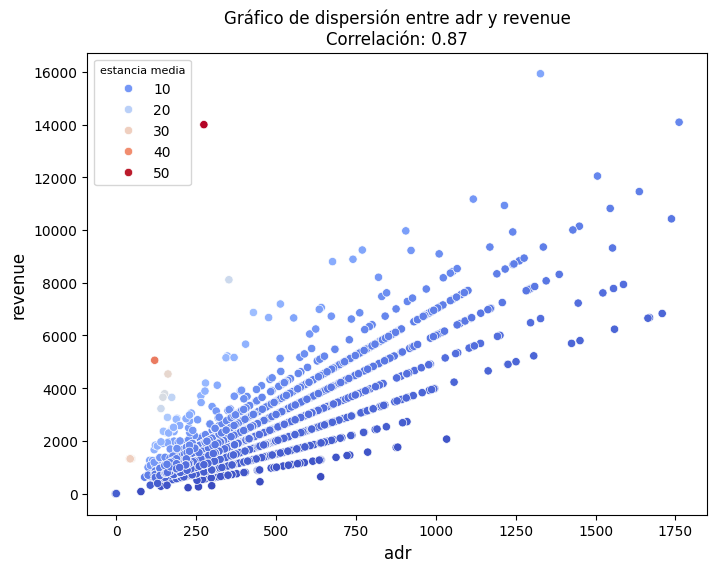

In [83]:
grafico_dispersion_con_correlacion(df_vacacional_confirmado_BQ, "adr", "revenue", "estancia_media")

Como pude verse la correlación entre ingresos y adr es más fuerte en Baqueira que en San Sebastián, siendo alta en ambos. Esta diferencia se explica por la mayor temporalidad en San Sebastián donde encontramos estaciones muy marcadas con diferentes niveles de precio, por otro lado en Baqueira la temporada prácticamente acaba con el invierno y el nivel de reservas en otras estancias es inexistente.

 ## Futuras líneas de análisis

Tras este primer estudio de reservas han surgido nuevas líneas de estudio que no han podido ser cubiertas en este primer análisis por su extensión limitada.
Las siguientes áreas han sido identificadas como prioritarias para futuras investigaciones:

-	Análisis de cancelaciones: Estudiar las causas y patrones de cancelación en relación con variables como la antelación de la reserva, la temporada, y la demografía del cliente. Esto ayudará a identificar factores de riesgo y a desarrollar estrategias para minimizar las cancelaciones y optimizar la ocupación.

-	Clientes repetidores: Caracterizar el perfil de los clientes repetidores, su frecuencia de reserva y preferencias. Analizar su comportamiento de reserva en comparación con nuevos clientes para evaluar la lealtad y desarrollar programas de fidelización más efectivos.

-	Antelación de reserva: Investigar cómo la antelación con la que se realizan las reservas afecta la ocupación, el ADR y los ingresos. Explorar la posibilidad de crear incentivos para reservas anticipadas o desarrollar estrategias para atraer reservas de última hora sin disminuir la rentabilidad.

Estos estudios proporcionarán una visión más detallada de los comportamientos de los clientes y permitirán mejorar la gestión del inventario y la estrategia de precios. Además, estos análisis pueden revelar oportunidades para mejorar la experiencia del cliente y aumentar la fidelización.
